In [34]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
%matplotlib inline

In [35]:
home = os.path.expanduser("~")

direc = os.listdir(".")

In [36]:
name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])

In [37]:
chi_2_1 = np.abs(2*df['chi_2_1'])
chi_2_2 = np.abs(2*df['chi_2_2'])
chi_subt = chi_2_1 - chi_2_2

In [38]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df
df['q_fitted_log'][df['q_fitted']>1] = np.log10( 1/df['q_fitted'][df['q_fitted']>1] )
df['q_fitted'][df['q_fitted']>1] = ( 1/df['q_fitted'][df['q_fitted']>1] )

13010


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


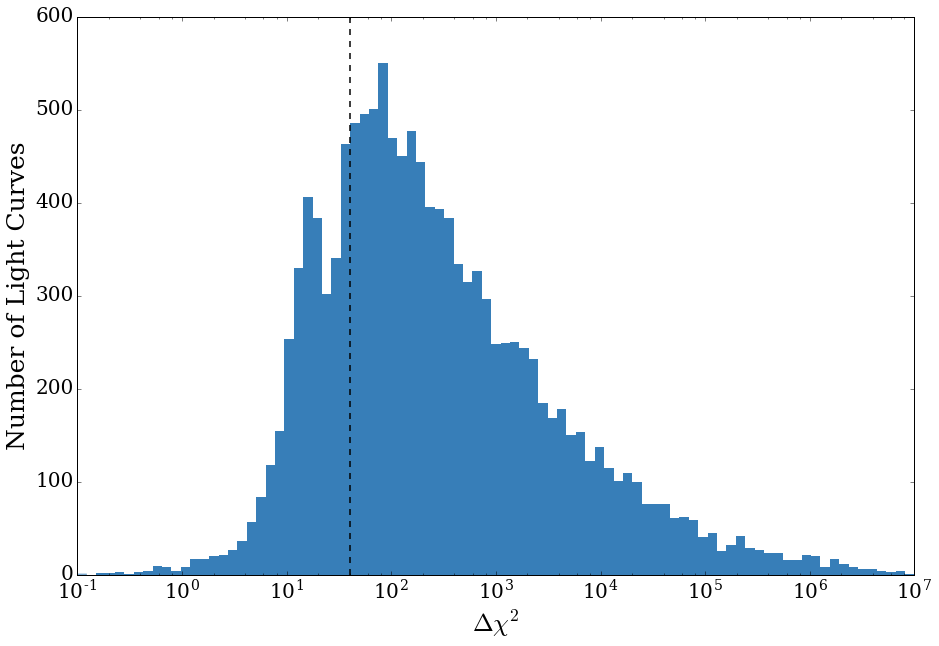

In [43]:
%matplotlib inline

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "serif"
plt.hist(np.abs(chi_2_1-chi_2_2),bins=np.logspace(np.log10(0.1),np.log10(1e7),90),
         facecolor = '#377eb8',edgecolor='none', linewidth=0)
        #weights = np.ones_like(df['q_true'])/float(len(df['q_true'])))
plt.axvline(x=40 , color='black', linestyle = '--',linewidth='1.5')
plt.xscale('log')
#plt.yscale('log')
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=20)

plt.ylabel('Number of Light Curves',size=25)
plt.xlabel('${\Delta{\chi}}^2$',size=25)

fig = plt.gcf()
fig.set_size_inches(15,10)
fig.savefig(home+'/Desktop/4.png')


In [30]:
G = 6.67e-11
m_sun = 1.989e30
kpc = 3.086e19
c = 2.99e8
const = 4*(G*m_sun)/(kpc*(c**2))
d_rel = (df['D_l']*df['D_s'])/(df['D_s']-df['D_l'])
df['theta_E'] = np.sqrt(df['m_l']*const / d_rel)

In [31]:
df['mu_l'] = np.sqrt((df['mu_l_b']**2)+(df['mu_l_l']**2))
df['mu_s'] = np.sqrt((df['mu_s_b']**2)+(df['mu_s_l']**2))

In [32]:
df['mu_rel'] =  df['mu_s']- df['mu_l']

In [33]:
df['weight'] = df['mu_rel']*df['theta_E']

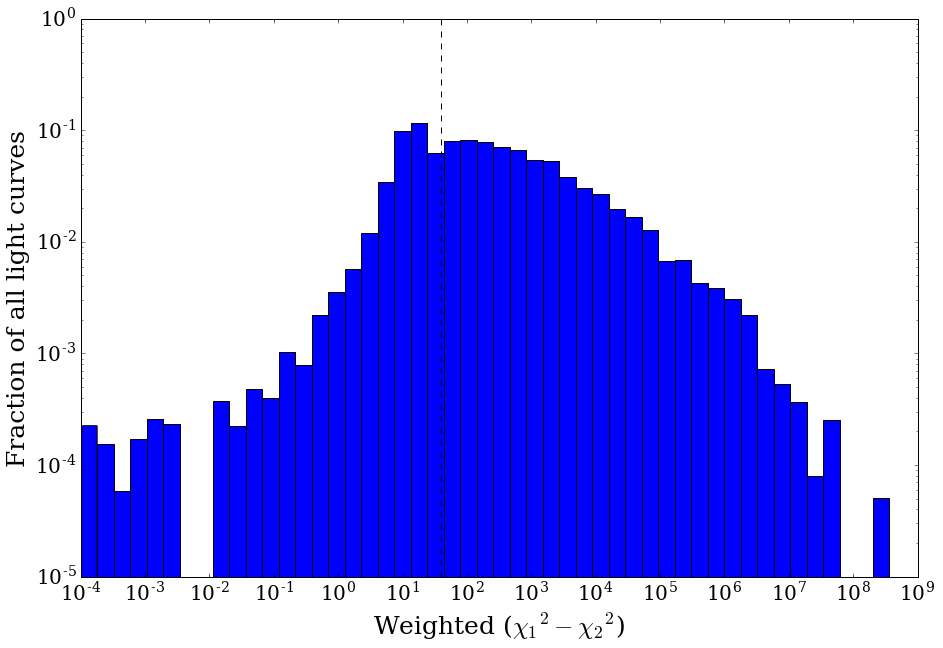

In [77]:
%matplotlib inline

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "serif"
plt.hist(np.abs(chi_2_1-chi_2_2),bins=np.logspace(np.log10(0.0001),np.log10(363165218),50),
        weights = df['weight']/np.sum(df['weight']))
# plt.hist(np.abs(chi_2_1-chi_2_2),bins=np.logspace(np.log10(0.0001),np.log10(363165218),50),
#          weights = np.ones_like(df['q_true'])/float(len(df['q_true']))) 
plt.axvline(x=40 , color='black', linestyle = '--')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=20)

plt.ylabel('Fraction of all light curves',size=25)
plt.xlabel('Weighted ('+'${{\chi}_1}^2 - {{\chi}_2}^2$'+')',size=25)

fig = plt.gcf()
fig.set_size_inches(15,10)
fig.savefig(home+'/Desktop/4_weighted.png')



In [46]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])
red_chi_2_2 = np.abs(2*df['chi_2_2'])
red_chi_subt = red_chi_2_1 - red_chi_2_2

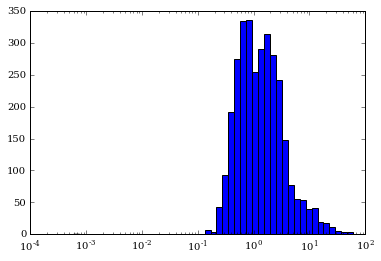

In [73]:
plt.hist(df['s_true'][((red_chi_2_1-red_chi_2_2)<40)&(df['u0_true']>0.1)],bins=np.logspace(np.log10(0.0006),np.log10(100),50))
         #label='$\Delta {{\chi}^2} <70$')
        #weights = np.ones_like(df['s_true'][((red_chi_2_1-red_chi_2_2)<40)])/float(len(df['s_true']))) #[((red_chi_2_1-red_chi_2_2)<0.001)])))
#&(df['u0_true']>0.1)

plt.xscale('log')

